In [ ]:
!

In [465]:
!pip install xgboost

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [466]:
import numpy as np # linear algebra
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import heapq
from nltk                            import FreqDist
import gensim
from gensim                          import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensim
from gensim.models                   import LdaModel
from sklearn.ensemble                import RandomForestClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics                 import classification_report
from sklearn.pipeline                import FeatureUnion
from sklearn.pipeline                import Pipeline
from sklearn.base                    import BaseEstimator, TransformerMixin
from sklearn.decomposition           import NMF, LatentDirichletAllocation
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import RandomizedSearchCV
from sklearn                         import metrics
from typing                          import List
from sklearn                         import tree
from xgboost                         import XGBClassifier

stopwords = stopwords.words('english')
sns.set_context('notebook')

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [291]:
class ItemSelector(BaseEstimator
                  ,TransformerMixin):
    """
    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [341]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [347]:
def extract_feature_names(model, name) -> List[str]:

    if hasattr(model, "get_feature_names"):
        return model.get_feature_names()
    elif hasattr(model, "n_clusters"):
        return [f"{name}_{x}" for x in range(model.n_clusters)]
    elif hasattr(model, "n_components"):
        return [f"{name}_{x}" for x in range(model.n_components)]
    elif hasattr(model, "components_"):
        n_components = model.components_.shape[0]
        return [f"{name}_{x}" for x in range(n_components)]
    elif hasattr(model, "classes_"):
        return classes_
    else:
        return [name]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [292]:
#reviews = pd.read_csv("north_avg_reviews - Sheet1.csv", encoding='latin1')
reviews = pd.read_csv("SCHOOL_RATING - Sheet1.csv", encoding='latin1')

reviews = reviews.dropna()

# remove formatting and short stuff
reviews.drop(reviews[reviews.Review.str.len() < 49].index, inplace=True)

print(reviews.shape)
reviews.head(25)


(387, 6)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RowCount,State,Metro,School,Rating,Review
0,1,OK,Oklahoma City,Edmond Noth,3,I have enjoyed my time at ENHS but the way COV...
4,5,OK,Oklahoma City,Edmond Noth,3,Even while going through my parents' gritty cu...
8,9,OK,Oklahoma City,Edmond Noth,3,Edmond North high school is full of a diverse ...
14,15,OK,Oklahoma City,Edmond Noth,3,North high school has some serious issues with...
18,19,OK,Oklahoma City,Edmond Noth,3,North High School in Torrance is an a decent s...
23,24,OK,Oklahoma City,Edmond Noth,3,"Academically it's a great school, but it's not..."
31,32,OK,Oklahoma City,Edmond Noth,3,Why I wouldn't go to this school if I could do...
35,36,OK,Oklahoma City,Edmond Noth,3,The overall quality of the school itself is ve...
39,40,OK,Oklahoma City,Edmond Noth,3,There are a lot of diverse clubs and groups to...
44,45,OK,Oklahoma City,Edmond Noth,3,"There are many clubs, but most do not particip..."


In [293]:

nlp = spacy.load('en_core_web_lg')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [294]:
# in this step we are going to remove code syntax from text 
reviews['Review_Cleaned_1'] = reviews['Review'].apply(normalize_text)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [295]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)


reviews['Review_Cleaned'] = reviews['Review_Cleaned_1'].apply(lambda x: cleanup_text(x, False))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [296]:
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print("Original Text:\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text:\n')
    print(summary)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [297]:
# Load model to return language object
nlp = spacy.load('en_core_web_sm')
# Calling nlp on our tweet texts to return a processed Doc for each
reviews['doc'] = [nlp(Review) for Review in reviews.Review]
reviews.sample(3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RowCount,State,Metro,School,Rating,Review,Review_Cleaned_1,Review_Cleaned,doc
520,521,OK,Oklahoma City,Edmond Noth,3,"They really only care about sports, namely foo...","They really only care about sports, namely foo...",really care sport namely football basketball ....,"(They, really, only, care, about, sports, ,, n..."
1258,1259,OK,Oklahoma City,Edmond Noth,2,Most of the teachers at North like there jobs ...,Most of the teachers at North like there jobs ...,teacher north like job good . however run occa...,"(Most, of, the, teachers, at, North, like, the..."
401,402,OK,Oklahoma City,Edmond Noth,3,I have not participated in very many clubs. I ...,I have not participated in very many clubs. I ...,participate many club . go fca fellowship chri...,"(I, have, not, participated, in, very, many, c..."


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\pinba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



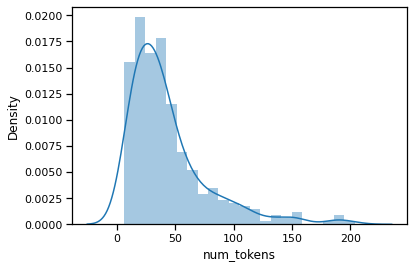

In [298]:
# Sum the number of tokens in each Doc
reviews['num_tokens'] = [len(token) for token in reviews.doc]
# Visualize histogram of tokens per tweet
g = sns.distplot(reviews.num_tokens)

In [299]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



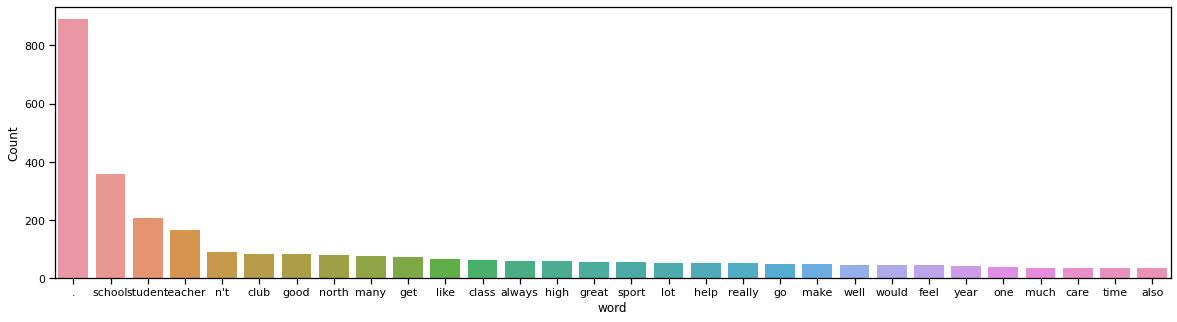

In [300]:
freq_words(reviews['Review_Cleaned'])

In [301]:
# remove unwanted characters, numbers and symbols
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].str.replace("[^a-zA-Z#]", " ")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-301-f2c53fdd6a2a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [302]:
# function to remove stopwords
def remove_stopwords(rev):
    stop_words = nltk.corpus.stopwords.words('english')
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

reviews_org = reviews

# remove short words (length < 3)
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in reviews['Review_Cleaned']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



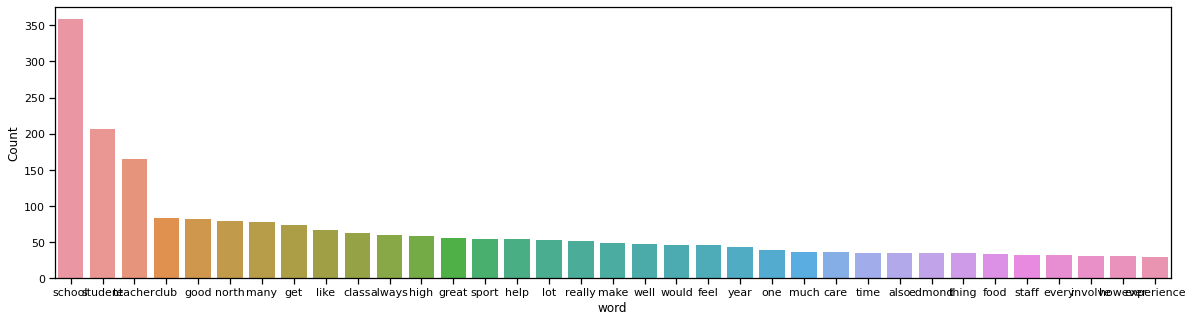

In [303]:
freq_words(reviews, 35)

In [304]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [305]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['even', 'parent', 'gritty', 'custody', 'battle', 'throughout', 'high', 'school', 'edmond', 'north', 'able', 'push', 'graduation', 'many', 'mentionable', 'teacher', 'devout', 'principal', 'attitude', 'personality', 'may', 'always', 'match', 'angry', 'teenager', 'high', 'school', 'authority', 'hold', 'brian', 'excellente', 'mack', 'mitchell', 'rachel', 'gonzales', 'stark', 'move', 'high', 'regard', 'make', 'sure', 'succeed', 'study', 'stay', 'track', 'balto', 'week', 'always', 'beyond', 'memorable', 'strong', 'stand', 'memory', 'much', 'institution', 'could', 'come', 'together', 'charity', 'unite', 'one']


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [306]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

print(len(reviews_2))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['time', 'way', 'covid', 'teacher', 'nervous', 'counselor', 'long', 'answer', 'simple', 'question'], ['parent', 'gritty', 'custody', 'battle', 'high', 'school', 'edmond', 'north', 'able', 'graduation', 'many', 'mentionable', 'teacher', 'principal', 'attitude', 'personality', 'angry', 'high', 'school', 'authority', 'high', 'regard', 'sure', 'succeed', 'study', 'track', 'balto', 'week', 'memorable', 'strong', 'stand', 'memory', 'much', 'institution', 'charity'], ['school', 'full', 'diverse', 'crowd', 'people', 'club', 'activity', 'willing', 'time', 'jrotc', 'ffa', 'robotic', 'fun', 'half', 'year', 'full', 'meetng', 'new', 'people', 'friendly', 'teacher', 'willing', 'work', 'student', 'sure', 'class'], ['north', 'high', 'school', 'serious', 'issue', 'student', 'safe', 'drug', 'alcohol', 'seat', 'culture', 'freshman', 'senior', 'die', 'car', 'accident', 'due', 'substance', 'abuse', 'serious', 'problem', 'rich', 'student', 'parent', 'fund', 'school', 'say'], ['north', 'high', 'school', 'to

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



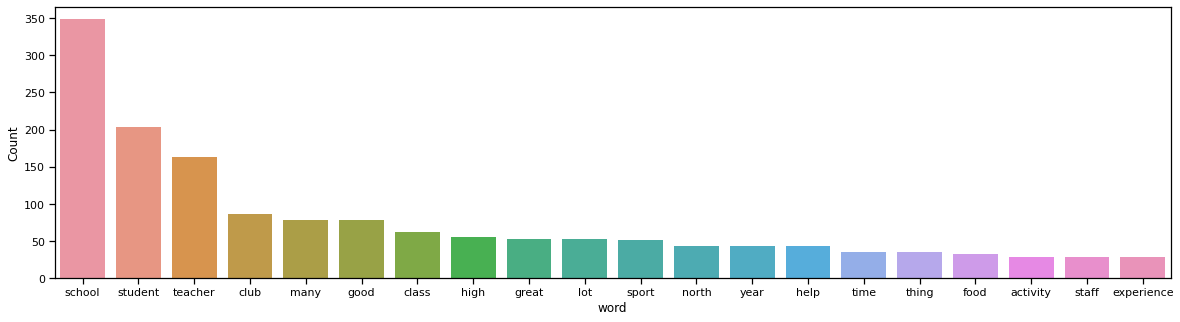

In [307]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [308]:
dictionary = corpora.Dictionary(reviews_2)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [309]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [310]:
# Creating the object for LDA model using gensim library
# LDA = gensim.models.ldamodel.LdaModel
LDA = LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [311]:
#lda_model.print_topics(num_words=4)
#lda_model.show_topics(num_words=4)
len(reviews_3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



387

In [312]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.025513  0.029121       1        1  20.942204
4      0.110659  0.032371       2        1  20.277050
5     -0.071290  0.126670       3        1  16.157986
2     -0.112287 -0.063538       4        1  16.101728
3      0.080854  0.026026       5        1  14.329837
1      0.047489 -0.097595       6        1   8.267475
0     -0.029912 -0.053053       7        1   3.923720, topic_info=          Term        Freq       Total Category  logprob  loglift
43        club   71.000000   71.000000  Default  30.0000  30.0000
33      school  282.000000  282.000000  Default  29.0000  29.0000
7      teacher  133.000000  133.000000  Default  28.0000  28.0000
84       great   42.000000   42.000000  Default  27.0000  27.0000
101       help   36.000000   36.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
427       main    0.674752    6.259935   Topic7  -5.6068   1.0106
96   attention    0.674610    5.387497   Topic7  -5.6070   1.1604
79      decent    0.674603    3.846558   Topic7  -5.6070   1.4973
369   facility    0.674593   14.490309   Topic7  -5.6070   0.1710
200  education    0.674562   16.021909   Topic7  -5.6070   0.0705

[469 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
511       4  0.827721  acceptance
41        1  0.084082    activity
41        2  0.126123    activity
41        3  0.588576    activity
41        4  0.126123    activity
...     ...       ...         ...
59        1  0.139357        year
59        2  0.390199        year
59        4  0.278713        year
59        5  0.055743        year
59        6  0.139357        year

[749 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 3, 4, 2, 1])

In [322]:
type(reviews_org)

reviews_4 = np.hstack((reviews_org
           ,pd.DataFrame(reviews_3,columns=['Topic_LDA'])))

reviews_4 = pd.DataFrame(reviews_4,columns=['org_idx', 'State', 'City'
                                           , 'School', 'Rating'
                                           , 'Raw_Review', 'PreProcessed_Review', 'Processed_Review', 'Flat_Review', 'Tokens', 'Topic_Review'])

reviews_4.head()

[1 'OK' 'Oklahoma City' 'Edmond Noth' 3
 "I have enjoyed my time at ENHS but the way COVID has been handled by some of the teachers leaves me nervous. I also think that the Counselors take too long to answer simple questions and sometimes don't answer at all."
 "I have enjoyed my time at ENHS but the way COVID has been handled by some of the teachers leaves me nervous. I also think that the Counselors take too long to answer simple questions and sometimes don't answer at all."
 'enjoy time enhs way covid handle teacher leave nervous also think counselors take long answer simple question sometimes answer'
 I have enjoyed my time at ENHS but the way COVID has been handled by some of the teachers leaves me nervous. I also think that the Counselors take too long to answer simple questions and sometimes don't answer at all.
 44 'time way covid teacher nervous counselor long answer simple question']


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,org_idx,State,City,School,Rating,Raw_Review,PreProcessed_Review,Processed_Review,Flat_Review,Tokens,Topic_Review
0,1,OK,Oklahoma City,Edmond Noth,3,I have enjoyed my time at ENHS but the way COV...,I have enjoyed my time at ENHS but the way COV...,enjoy time enhs way covid handle teacher leave...,"(I, have, enjoyed, my, time, at, ENHS, but, th...",44,time way covid teacher nervous counselor long ...
1,5,OK,Oklahoma City,Edmond Noth,3,Even while going through my parents' gritty cu...,Even while going through my parents' gritty cu...,even parent gritty custody battle throughout h...,"(Even, while, going, through, my, parents, ', ...",121,parent gritty custody battle high school edmon...
2,9,OK,Oklahoma City,Edmond Noth,3,Edmond North high school is full of a diverse ...,Edmond North high school is full of a diverse ...,edmond north high school full diverse crowd pe...,"(Edmond, North, high, school, is, full, of, a,...",94,school full diverse crowd people club activity...
3,15,OK,Oklahoma City,Edmond Noth,3,North high school has some serious issues with...,North high school has some serious issues with...,north high school serious issue keep student g...,"(North, high, school, has, some, serious, issu...",67,north high school serious issue student safe d...
4,19,OK,Oklahoma City,Edmond Noth,3,North High School in Torrance is an a decent s...,North High School in Torrance is an a decent s...,north high school torrance decent school teach...,"(North, High, School, in, Torrance, is, an, a,...",22,north high school torrance decent school teach...


In [ ]:
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#X=np.array(reviews_3).reshape(-1, 1)
#y=reviews_org['Rating']
#clf.fit(X, y)

In [400]:
reviews_4['Rating']

reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x < 2 else 0)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [401]:
#y=reviews_4['Rating']
y=reviews_4['Rating_binary']
y=y.astype('int')

X=reviews_4[['Raw_Review']].fillna('BLANK')


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [479]:
pipeline = Pipeline([

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Categorical Preprocessors
            # ('repo_preprocessor', preprocessor),
            
                 
            # INCIDENT CLOSE NOTES PIPELINE
            ('review', Pipeline([
                ('selector', ItemSelector(key='Raw_Review')),
                ('tfidf', TfidfVectorizer()),
                ('lda', LatentDirichletAllocation(
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0))
            ])),                  

        ],

    )),
    
    # classifier place holder
    ('classifier', XGBClassifier())

])


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [496]:
def auto_paramterization(comment_term_freq):
    parameters = {

        # term frequency vectorizer stop words 
        'union__review__tfidf__stop_words':       ('english', None),     

        # ngram ranges         
        'union__review__tfidf__ngram_range': ((1, 1)        # force single term
                                             ,(1, 4)        # full spectrum up-to 4 term combination 
                                             ,(2, 4)),      # force combination

        # max term document frequecn#y
        'union__review__tfidf__max_df' :       comment_term_freq,       

        # max features in term frequency 
        'union__review__tfidf__max_features':       (100, 1000, 10000),      

        # lda topicization parameters  
        'union__review__lda__n_components' :       (5, 10, 15),       

        # feature union transformer weights
       # 'union__transformer_weights' : 
       #     [dict(repo_preprocessor=.2, defect_reason=.2, comment=.2, short_description=0, close_notes=0)                                    
       #     ,dict(repo_preprocessor=.2, defect_reason=.3, comment=.35, short_description=0 ,close_notes=0)] ,

        # classifier parameterizer
        #'classifier' : [XGBClassifier(use_label_encoder=False)],
        
        'classifier__booster' : ('gbtree', 'dart')
       ,'classifier__eta' : (0.01, .25, .5, .75, 1)
        
        #'classifier__criterion' : ('gini', 'entropy'), 
        #'classifier__splitter' : ('best', 'random'),         
        #'classifier__max_depth' : (2, 3, 4), 
        #'classifier__max_features' : ('auto', 'sqrt', 'log2', 10, 100, 1000),

    }

    return parameters

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [395]:
evolution_domain = (0.6, 0.7, 0.8)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [516]:
classifier_iterator_preload = 1000

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# broad search seed
auto_max_term_frq = (0.9, .6, .3, .1, .01)
test_train_enabled=False

for evolution_state in evolution_domain:

    # initialize timer
    t0 = time()

    # check if test train enabled
    if test_train_enabled:
        # training set evolver
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=evolution_state)
    else:
        X_train=X; X_test=X
        y_train=y; y_test=y

    # switch between GRID and RANDOM searches
    #grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
    grid_search = RandomizedSearchCV(pipeline
                                    , auto_paramterization(auto_max_term_frq)
                                    , n_jobs=-1
                                    , verbose=1
                                    , n_iter=classifier_iterator_preload*evolution_state)

    # fit gridsearch / pipeline
    grid_search.fit(X_train, y_train)

    # search metrics
    print("search iteration train ratio %0.3f rows %0.1f" % (0.1 ,len(y_train)))
    print("done in %0.3fs" % (time() - t0))
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")

    # grid search parameters
    best_parameters = grid_search.best_estimator_.get_params()

    # loop through each parameter, displaying top result
    i=0
    for param_name in sorted(auto_paramterization(auto_max_term_frq).keys()):
        print("(%r): \t%s  %r" % (i, param_name, best_parameters[param_name]))
        
        # record recent heights
        if param_name == 'union__review__tfidf__max_df':
            auto_max_term_frq = (round(best_parameters[param_name]*0.6,4)
                                ,round(best_parameters[param_name]*0.8,4)
                                ,round(best_parameters[param_name]*1.0,4)
                                ,round(best_parameters[param_name]*1.2,4)
                                ,round(best_parameters[param_name]*1.4,4))
            print("Iterative Adjusted Term Freq Ranges")
            print(auto_max_term_frq)
        i=i+1

    y_pred = grid_search.predict(X_test)
    print("")
    print("confusion matrix")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("accuracy score")
    print(metrics.accuracy_score(y_test, y_pred))
    print("## iteration end #####################################")
    #print(classification_report(y_pred, y_test))


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fitting 5 folds for each of 600 candidates, totalling 3000 fits


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 387.0
done in 614.088s
Best score: 0.767
Best parameters set:
(0): 	classifier__booster  'dart'
(1): 	classifier__eta  0.01
(2): 	union__review__lda__n_components  15
(3): 	union__review__tfidf__max_df  0.6
Iterative Adjusted Term Freq Ranges
(0.36, 0.48, 0.6, 0.72, 0.84)
(4): 	union__review__tfidf__max_features  1000
(5): 	union__review__tfidf__ngram_range  (1, 1)
(6): 	union__review__tfidf__stop_words  None

confusion matrix
[[291   6]
 [ 79  11]]
accuracy score
0.7803617571059431
## iteration end #####################################
Fitting 5 folds for each of 700 candidates, totalling 3500 fits


In [513]:
# LDA Top Topics
# lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
clf = grid_search.best_estimator_.named_steps['classifier']
feature_names = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['tfidf'].get_feature_names()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [487]:
print(clf)
#fig, ax = plt.subplots(figsize=(30, 30))
#xgb.plot_tree(model, num_trees=4, ax=ax)
#plt.show()

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: 'XGBClassifier' object has no attribute 'tree_'

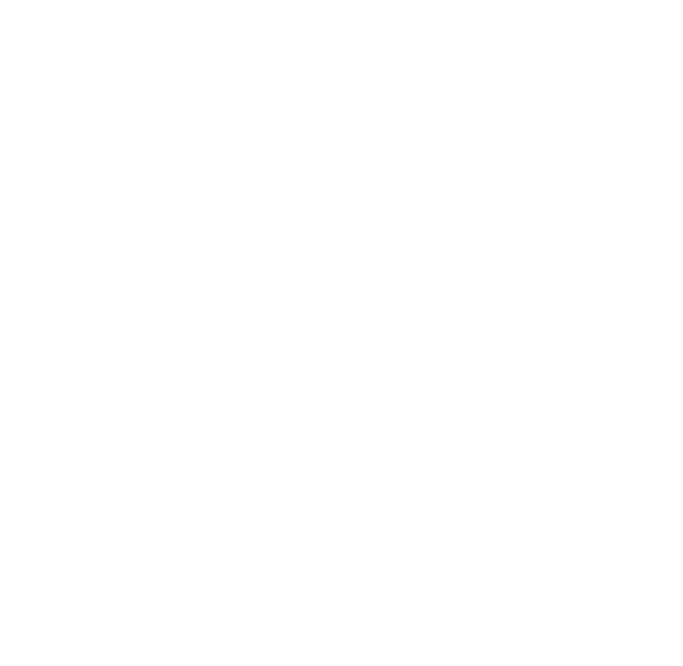

In [507]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
#XGBClassifier().plot_tree(clf, num_trees=4, ax=ax)

#tree.plot_tree(clf);
plt.show()




In [514]:
# LDA Top Topics
lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
feature_names = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['tfidf'].get_feature_names()

print_top_words(lda
               ,feature_names
               ,5)


Topic #0: but the, pretty good, good but, are pretty good, comes to
Topic #1: you re, if you re, is always, you can, if you
Topic #2: next century of students, really updated, our school has really, north has just, rest of the school
Topic #3: north is, get involved, to get, there is, one of the
Topic #4: only the required material, my horizons beyond, north has been, not only the, only the required
Topic #5: do not, is very, policies are, is very involved, not participate
Topic #6: school sophomorefeb 28, sophomorefeb 28, high school sophomorefeb 28, high school sophomorefeb, school sophomorefeb
Topic #7: through the, high school sophomorefeb 21, school sophomorefeb 21, sophomorefeb 21, high school sophomorefeb
Topic #8: some very, some very influential, some very influential teachers, teachers at this, teachers at this school
Topic #9: lot of, the state, in the state, most of the, most of



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



comment_nlp_topic__0    0.076038
comment_nlp_topic__1    0.081744
comment_nlp_topic__2    0.099851
comment_nlp_topic__3    0.148661
comment_nlp_topic__4    0.098348
comment_nlp_topic__5    0.000000
comment_nlp_topic__6    0.126224
comment_nlp_topic__7    0.088507
comment_nlp_topic__8    0.111175
comment_nlp_topic__9    0.169453
dtype: float32


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:>

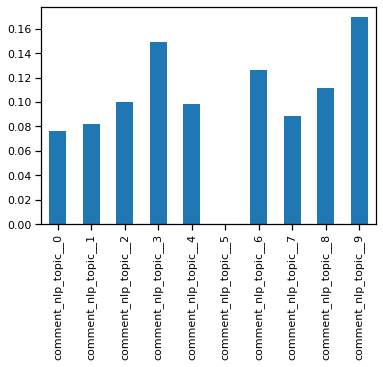

In [515]:
#print(grid_search.best_estimator_.named_steps['classifier'].feature_importances_)
#feature_names = grid_search.best_estimator_.named_steps['classifier'].get_feature_names()

clf_feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
#print(len(clf_feature_importance))

#encoded_categorical_features = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('repo_preprocessor').transformers_[1][1].get_feature_names()

# capture comment nlp topics
comment_nlp_model = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
comment_nlp_topics = extract_feature_names(comment_nlp_model
                                          , 'comment_nlp_topic_')

features = np.array(list(comment_nlp_topics))

feature_importance = pd.Series(data=clf_feature_importance
                               , index = features )

print(feature_importance)
type(feature_importance)
feature_importance.plot.bar()
#grid_search.best_estimator_.named_steps['classifier'].feature_names_)